## Qestion 1

Waiting time is exponentially distributed with the corresponding $\lambda$.
For exponential distribution we have:

$E(x) = 1/ \lambda$

Therefore, the expected time to extinction is:

$$ \sum_{k}1/\lambda_k $$

Thus, if $ \sum_{k}1/\lambda_k $ is finite, population explodes in finite time.

However, if $ \sum_{k}P_k =1 $ then $1- \sum_{k}P_k =1 $ or the probability of having infinite birth at time t is zero. 



For an explosive process whcih cannot be normalized for all finite times, the term $ \sum_{k}1/\lambda_k $ has to converge to a finite number:



In [65]:
import numpy as np
k = np.arange(1,1000,1)
sum(1/k**2)

1.6439335666815615

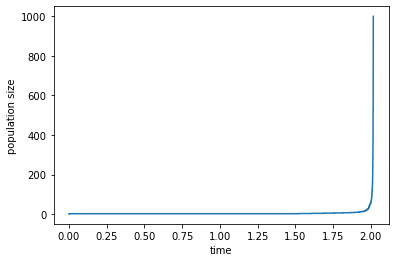

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random

no_steps = 1000
x = np.zeros(no_steps)
t = np.zeros(no_steps)

x[0] =1

    
for k in range(no_steps-1):

    rates  = x[k]**2
    
     
    dt = -math.log(1 - random.uniform(0.0, 1.0)) / rates 

     
    t[k+1]= t[k]+dt
    
    x[k+1] = x[k] +1


plt.step(t,x)
plt.xlabel('time')
plt.ylabel('population size')
plt.show()



## Qestion 2

Master equation: $-(\lambda+\mu + \nu)P_n + (\lambda (n-1)+\nu)P_{n-1}+ (n+1)\mu P_{n+1}$

$ M'_t = \sum_1{n P'_n} $ Therefore:

$ M'_t = -(\lambda+\mu)\sum_1{n^2 P_n}+(\lambda)\sum_1{n (n-1) P_{n-1}}+(\mu)\sum_1{n (n+1) P_{n+1}}- \nu \sum_1{n P_n}+\nu \sum_1{n P_{n-1}} $

From birth-death without immigration:

$ M'_t = -(\lambda+\mu) M_t - \nu \sum_1{n P_n}+\nu \sum_1{n P_{n-1}}$

$ M'_t = -(\lambda+\mu) M_t -\nu \sum_1{n (P_n - P_{n-1})}$

$ M'_t = -(\lambda+\mu) M_t + \nu$


In [45]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random


events = np.array([1,-1])
no_events = np.array([0,1])





def Sim_func(size,maxtime, l, m,v,initial):
    ns = 0
    time = 0
    x = np.zeros(size)
    t = np.zeros(size)
    x[0] = initial 
    while time <= maxtime:

        rates  = np.array([(l*x[ns])+v, m*x[ns]])
    
        total_rate  =  sum(rates)

        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate 

        choose = np.random.choice(no_events, size=1, p=rates/total_rate)
        time = time +dt
        t[ns+1]= t[ns]+dt
        x[ns+1] = x[ns] + events[choose][0]
        ns = ns + 1
        if ns == size-1:
            break
    return t[0:ns], x[0:ns]


t,x = Sim_func(10000, maxtime = 100, l = 4, m= 3, v = 2 ,initial=1)   


T = len(t)
N = np.zeros(T)
N[0] = 1
h = 0.001
l = 4
m = 3
v = 2
times = np.zeros(T)
for j in range(T-1):
    N[j+1] = N[j] +  h*((l-m)*N[j] + v)
    times[j+1] = times[j] + 1
    


print('averege for stochastic process:',np.mean(x))
print('averege for differential equation:',np.mean(N))

averege for stochastic process: 767.2747274727473
averege for differential equation: 6566.792845042259


## Qestion 3

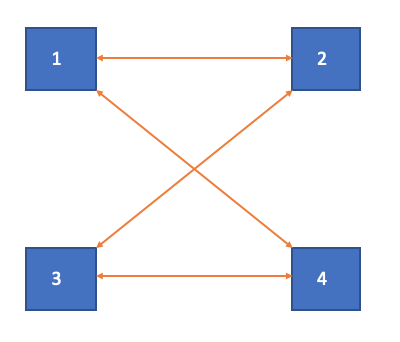

As is shown above, all states communicate with one another (albeit not directly), thus the chain is irreducible.

It's periodic because $P^1$ has $P_{ii} = 0$. The period is 2. For $P^n, n = 2,4,6,8,10,..$ we have:

In [73]:
import numpy as np
from numpy.linalg import matrix_power
P = np.array([[0,1/2,0,1/2],[1/4,0,3/4,0], [0,3/4,0,1/4], [1/2,0,1/2,0]])
matrix_power(P,2) 


array([[0.375 , 0.    , 0.625 , 0.    ],
       [0.    , 0.6875, 0.    , 0.3125],
       [0.3125, 0.    , 0.6875, 0.    ],
       [0.    , 0.625 , 0.    , 0.375 ]])

In [69]:
from scipy import linalg
eigenval, eigenvec = linalg.eig(P,right=False , left = True)
print(eigenvec)


[[-0.31622777  0.31622777 -0.5         0.5       ]
 [ 0.63245553  0.63245553 -0.5        -0.5       ]
 [-0.63245553  0.63245553  0.5        -0.5       ]
 [ 0.31622777  0.31622777  0.5         0.5       ]]


The second eigenvector corresponding to $\lambda = 1$ is the stationary distribution

Because there exist a unique stationary distribution then all states must be positive recurrent

## Qestion 4

To calculate the proportion of time the gene is unbound it suffice to calculate the stationary distribution for:
$P = \begin{pmatrix} 1-\lambda & \lambda \\ 1/\mu & 1-1/\mu \end{pmatrix}$

$P^T = \begin{pmatrix} 1-\lambda & 1/\mu \\ \lambda & 1-1/\mu \end{pmatrix} $

$Eigenvalues = \begin{pmatrix} 1 ,&  (-1+\mu-\mu \lambda)/\mu \end{pmatrix}$

$Eigenvector for \lambda =1 : \begin{pmatrix} 1/\mu\lambda ,&1 \end{pmatrix}$

$Normalization: \begin{pmatrix} 1/(1+ \lambda \mu) ,&  \mu\lambda/ (1+ \mu\lambda) \end{pmatrix}$

$Porportion\;  of\; time\; spent\; unbound = 1/(1+ \lambda \mu)$

## Qestion 5

The probability of no event happening reduces exponentially as the time or rate increases:

$P = e^ {-\lambda*t}$

The probability of an event occuring is:

$F = 1- e^ {-\lambda*t}$

The prbability density function would be:

$\frac{d}{dt}(1- e^ {-\lambda*t}) = \lambda e^{-\lambda*t}$

The expected value:

$\int_0^\infty t \lambda e^{-\lambda*t} dt = \frac{1}{\lambda}$